**Steps**
- Read and Normalise Data
- Generate W
- No training involved, directly make predictions
- Find the best value of Tau (Bandwidth) (Cross Validation)

## Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfx = pd.read_csv("./weightedX.csv")
dfy = pd.read_csv("./weightedY.csv")

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


In [5]:
u = X.mean()
std = X.std()

X = (X-u)/std

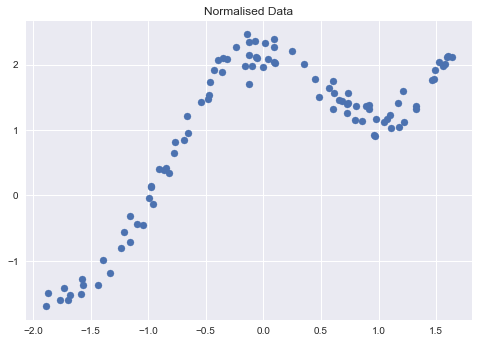

In [6]:
plt.style.use("seaborn")
plt.scatter(X,Y)
plt.title("Normalised Data")
plt.show()

> **above is clearly not Linear Regression Problem**

## Computing W
> m x m Matrix

In [7]:
# generating diagonal matrix
diag = np.eye(5)

In [8]:
print(type(diag))
print(diag.shape)
diag = np.mat(diag)
print(type(diag))

<class 'numpy.ndarray'>
(5, 5)
<class 'numpy.matrix'>


### Difference between numpy array and numpy matrices
- a*b --> matrices --> Matrix Multiplication
- a*b --> arrays --> Element Wise

In [9]:
def get_W(x,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        W[i,i] = np.exp(np.dot((X[i]-x),(X[i]-x).T)/(-2*tau*tau))
        
    return W

In [10]:
X = np.mat(X)
Y = np.mat(Y)

W = get_W(-1,X,1)

In [11]:
print(W.shape)

(99, 99)


In [12]:
print(W)

[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [13]:
W = get_W(-1,X,100)

In [14]:
print(W)

[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


**as we increase tau then large bandwidth that means more contribution of far points also**

**larger tau means larger bandwidth**

**as we increase tau it becomes similar to Linear Regression**

## Making Predictions

In [15]:
def predict(X,Y,query_x,tau):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    
    qx = np.mat([1,query_x])
    
    W = get_W(qx,X_,tau)

    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))

    return theta,np.dot(qx,theta)
    

In [16]:
predict(X,Y,1,0.1)

(matrix([[ 1.38727728],
         [-0.22846096]]),
 matrix([[1.15881632]]))

In [17]:
predict(X,Y,0,0.1)

(matrix([[2.15149237],
         [0.21386669]]),
 matrix([[2.15149237]]))

## Visualise Predictions, Analyse the effect of Tau values

In [21]:
def plot_prediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred)
    
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title(f"Tau is {tau}")
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='orange')
    plt.show()
    

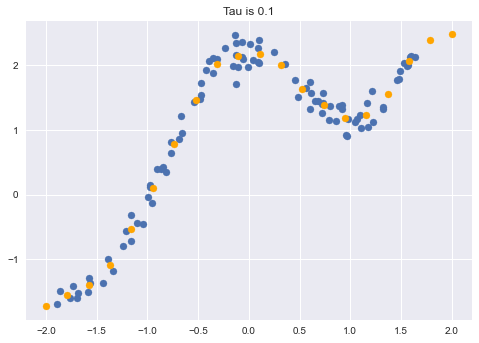

In [22]:
plot_prediction(0.1)

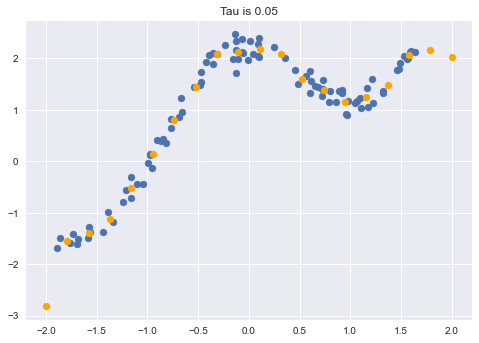

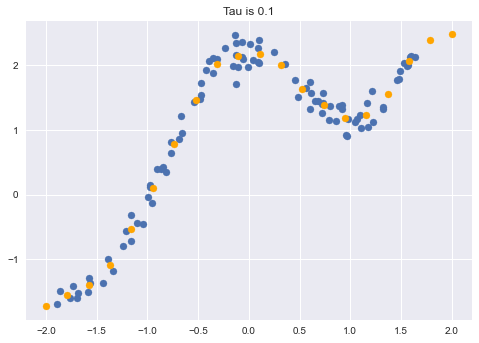

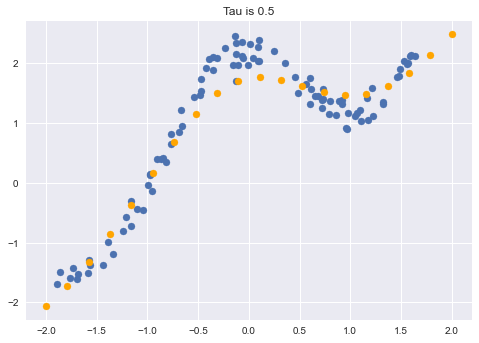

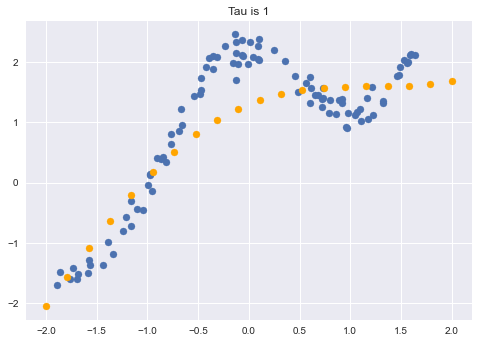

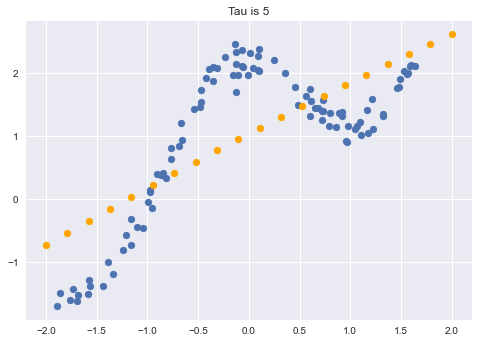

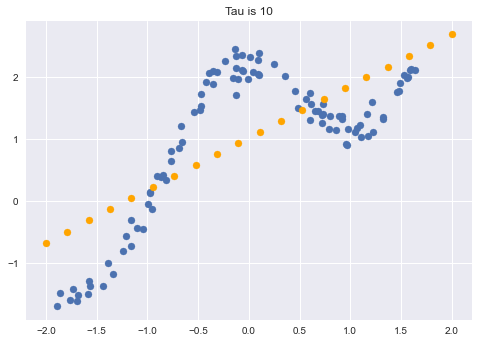

In [23]:
taus = [0.05,0.1,0.5,1,5,10]
for tau in taus:
    plot_prediction(tau)

In [1]:
import numpy as np
A = np.random.randint(5,size=(4,4))
B = np.random.randint(5,size=(4,4))

In [2]:
print(A)
print(B)

[[4 0 2 2]
 [4 3 1 2]
 [3 3 2 3]
 [0 3 0 2]]
[[3 0 3 2]
 [3 1 4 1]
 [3 2 2 1]
 [0 2 2 3]]


In [3]:
print(A*B)

[[12  0  6  4]
 [12  3  4  2]
 [ 9  6  4  3]
 [ 0  6  0  6]]


In [4]:
A = np.mat(A)
B = np.mat(B)

In [5]:
print(A*B)

[[18  8 20 16]
 [24  9 30 18]
 [24 13 31 20]
 [ 9  7 16  9]]
